Generate random gaussian fields

In [1]:
# external
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
# modules from curvedsky/wrap/
import curvedsky as cs

Set parameters

In [2]:
nside = 512  # Nside of Healpix map
npix  = 12*nside**2  # Numer of pixels of Healpix map
lmax  = 2*nside # Maximum multipole of harmonic coefficients to be computed

Input angular power spectrum

In [3]:
Tcmb = 2.72e6
nl = np.ones(lmax+1)*(10./Tcmb*np.pi/10800.)**2 # this is the white noise spectrum with 10 uK'

Generate random gaussian fields

In [4]:
simn = 2  # nunmber of iterations
nmap = np.zeros((simn,npix)) # map for each random field
for i in range(simn):
    # generate random Gaussian fields from the angular power spectrum, nl
    nalm = cs.utils.gauss1alm(lmax,nl) # NOTE: alm is Healpix order, not healpy order
    # convert to Healpix map
    nmap[i,:] = cs.utils.hp_alm2map(nside,lmax,lmax,nalm)

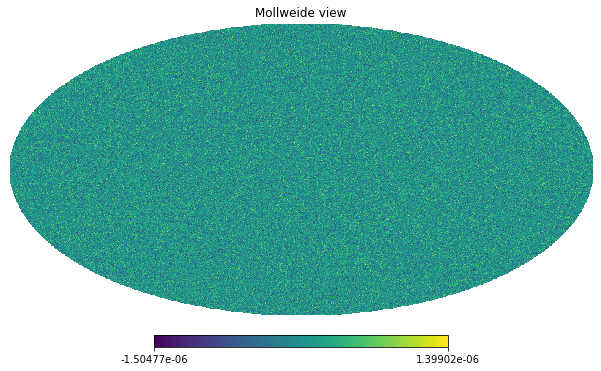

In [5]:
hp.mollview(nmap[0,:])

Compute angular power spectrum

In [6]:
cl = np.zeros((simn,lmax))
for i in range(simn):
    nalm = cs.utils.hp_map2alm(nside,lmax,lmax,nmap[i,:])
    cl = cs.utils.alm2cl(lmax,nalm)
print(np.mean(cl/nl))

0.993260591150173


Generate multiple random gaussian fields

In [7]:
N = 3
Cov = np.zeros((N,N,lmax+1))
cl  = np.zeros((4,lmax+1))

In [8]:
cl[:,2:lmax+1] = np.loadtxt('../data/lensedcls.dat',unpack=True,usecols=(1,2,3,4))[:,:lmax-1]
print(np.shape(cl))

(4, 1025)


In [9]:
Cov[0,0,:] = cl[0,:lmax+1]
Cov[1,1,:] = cl[1,:lmax+1]
Cov[2,2,:] = cl[2,:lmax+1]
Cov[0,1,:] = Cov[1,0,:] = cl[3,:lmax+1]

In [10]:
simn = 2  # nunmber of iterations
cls = np.zeros((4,simn,lmax+1)) # map for each random field
for i in range(simn):
    # generate random Gaussian fields from the angular power spectrum, nl
    alm = cs.utils.gaussalm(Cov)
    print(np.shape(alm),np.sum(alm))
    # compute cl
    for j in range(N):
        cls[j,i,:] = cs.utils.alm2cl(lmax,alm[j])
    cls[3,i,:] = cs.utils.alm2cl(lmax,alm[0],alm[1])
mcl = np.mean(cls,axis=1)

(3, 1025, 1025) (1936.3518913483047+22956.177024453933j)
(3, 1025, 1025) (-13082.045361281822-11904.573557780486j)


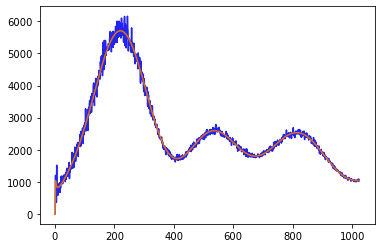

In [11]:
plt.plot(mcl[0,:])
plt.plot(Cov[0,0,:])

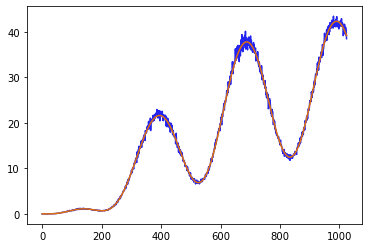

In [12]:
plt.plot(mcl[1,:])
plt.plot(Cov[1,1,:])

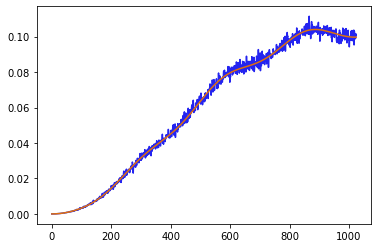

In [13]:
plt.plot(mcl[2,:])
plt.plot(Cov[2,2,:])

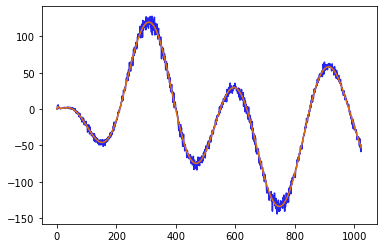

In [14]:
plt.plot(mcl[3,:])
plt.plot(Cov[1,0,:])